# Program 8

Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data
set for clustering using k-Means algorithm. Compare the results of these two
algorithms and comment on the quality of clustering. You can add Java/Python ML
library classes/API in the program.

Harsh R

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

In [2]:
iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
#print(X.shape)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

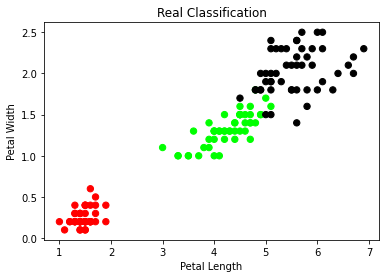

In [3]:
colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications
plt.figure()
#plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:  [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


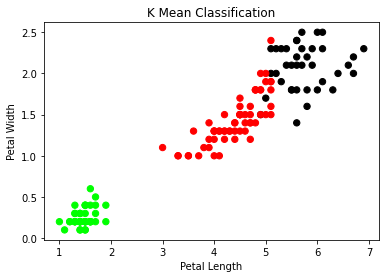

In [4]:
model = KMeans(n_clusters=3)
model.fit(X)

plt.figure()
#plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, model.labels_))
plt.show()



The accuracy score of EM :  0.9666666666666667
The Confusion matrixof EM :  [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


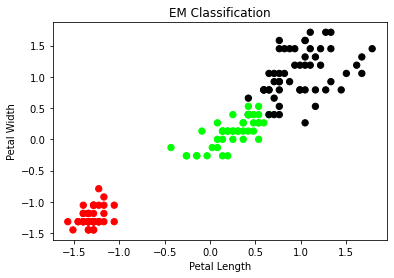

In [5]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
scalar.fit(X)
xsa = scalar.transform(X)

xs=pd.DataFrame(xsa, columns=X.columns)

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

ypred = gmm.predict(xs)

plt.figure()
plt.scatter(xs.Petal_Length, xs.Petal_Width, c=colormap[ypred], s=40)
plt.title('EM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of EM : ',sm.accuracy_score(y, ypred))
print('The Confusion matrixof EM : ',sm.confusion_matrix(y, ypred))
plt.show()